In [1]:
!pip install ultralytics opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 6.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


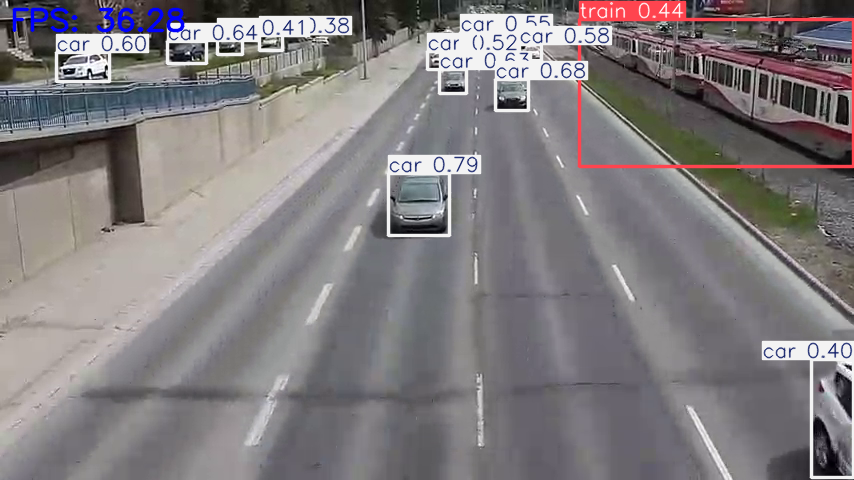

End of video reached or failed to grab frame


In [5]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import IPython.display as display
import time

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Replace with the path to your YOLOv8 model

# Path to the uploaded video file
video_path = '/content/gdrive/MyDrive/cars-in-the-road.mp4'  # Replace with the path to your video file

# Open the video file
cap = cv2.VideoCapture(video_path)

# Loop to process the video frame by frame
while cap.isOpened():
    # Record start time
    start_time = time.time()

    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        print("End of video reached or failed to grab frame")
        break

    # Run YOLOv8 inference on the frame
    results = model(frame)

    # Draw bounding boxes and labels on the frame
    annotated_frame = results[0].plot()

    # Calculate FPS for the current frame
    end_time = time.time()
    fps = 1 / (end_time - start_time)

    # Add FPS text to the frame
    fps_text = f"FPS: {fps:.2f}"
    cv2.putText(annotated_frame, fps_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Clear previous frame and display the new one
    display.clear_output(wait=True)  # Clear the previous output
    cv2_imshow(annotated_frame)  # Display the current frame

    # Optional: Add a small delay to mimic video frame rate (e.g., 25 milliseconds)
    time.sleep(0.03)  # Adjust this value to control the frame rate

# Release the capture object
cap.release()


In [3]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import IPython.display as display
import time

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Replace with the path to your YOLOv8 model

# Path to the uploaded video file
video_path = '/content/gdrive/MyDrive/cars-in-the-road.mp4'  # Replace with the path to your video file

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the video's width, height, and frames per second (fps)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps_input = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create a VideoWriter object to save the video
output_path = '/content/output_video_with_fps.mp4'  # Output video file path
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for the video format
out = cv2.VideoWriter(output_path, fourcc, fps_input, (width, height))

# Loop to process the video frame by frame
while cap.isOpened():
    # Record start time
    start_time = time.time()

    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        print("End of video reached or failed to grab frame")
        break

    # Run YOLOv8 inference on the frame
    results = model(frame)

    # Draw bounding boxes and labels on the frame
    annotated_frame = results[0].plot()

    # Calculate FPS for the current frame
    end_time = time.time()
    fps = 1 / (end_time - start_time)

    # Add FPS text to the frame
    fps_text = f"FPS: {fps:.2f}"
    cv2.putText(annotated_frame, fps_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Save the frame with the FPS overlay to the output video
    out.write(annotated_frame)

    # Optional: Display the current frame in Colab (comment out if not needed)
    # display.clear_output(wait=True)  # Clear the previous output
    # cv2_imshow(annotated_frame)  # Display the current frame

    # Optional: Add a small delay to mimic video frame rate (e.g., 25 milliseconds)
    time.sleep(0.03)  # Adjust this value to control the frame rate

# Release the capture and video writer objects
cap.release()
out.release()

# Inform the user about the saved video
print(f"Video saved as {output_path}")


100%|██████████| 6.25M/6.25M [00:00<00:00, 20.7MB/s]



0: 384x640 1 person, 8 cars, 1 truck, 102.5ms
Speed: 16.7ms preprocess, 102.5ms inference, 742.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8 cars, 1 truck, 6.9ms
Speed: 3.4ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9 cars, 1 truck, 6.9ms
Speed: 4.1ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9 cars, 1 truck, 6.7ms
Speed: 2.7ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9 cars, 1 truck, 6.9ms
Speed: 3.7ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9 cars, 1 truck, 6.9ms
Speed: 3.7ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9 cars, 1 truck, 8.1ms
Speed: 3.0ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 38